In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Question 5
Download the data file “government-expenditure-on-education.csv” from Canvas Tutorial Folder.
It depicts the government’s educational expenditure over the years (downloaded in July 2021 from https://data.gov.sg/dataset/government-expenditure-on-education)
Predict the educational expenditure of year 2021 based on linear regression. Solve the problem using Python with a plot. Note: please use the file from the canvas link.
Hint: use Python packages like numpy, pandas, matplotlib.pyplot, numpy.linalg.

In [2]:
df = pd.read_csv('government-expenditure-on-education.csv')
print(df.head(5))

expenditure_list = df['recurrent_expenditure_total'].tolist()
yearList = df['year'].tolist()

m_list = [[1]*len(yearList), yearList]
print(m_list)

X = np.array(m_list).T
y = np.array(expenditure_list)

w = np.linalg.inv(X.T @ X) @ X.T @ y
print(w)

   year  recurrent_expenditure_total
0  1981                       712732
1  1982                       983751
2  1983                      1107113
3  1984                      1272559
4  1985                      1388186
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]]
[-6.4843247e+08  3.2683591e+05]


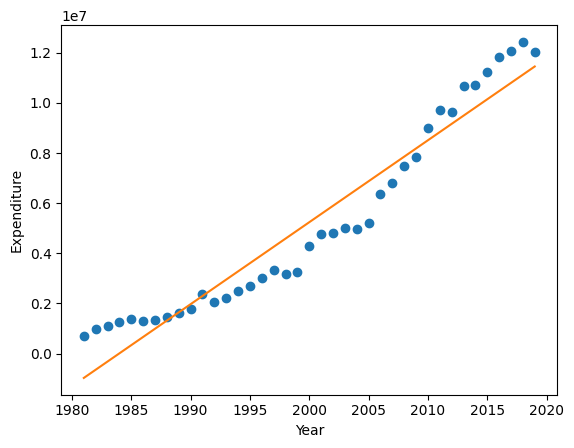

In [3]:
y_line = X @ w
plt.plot(yearList, expenditure_list, 'o', label="Expenditure over the years")
plt.plot(yearList, y_line)
plt.xlabel('Year')
plt.ylabel('Expenditure')
plt.show()

In [4]:
y_predict = np.array([1, 2021]) @ w
print(y_predict)

12102904.270643115


# Question 6
Download the CSV file for red-wine using “ wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-
databases/wine-quality/winequality-red.csv",sep=';') ” . Use Python to perform the following tasks. Hint: use Python packages like numpy, pandas, matplotlib.pyplot, numpy.linalg, and sklearn.metrics.

In [5]:
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


(a) Take y = wine.quality as the target output and x = wine.drop('quality',axis = 1)as the input features. Assume the given list of data is already randomly indexed (i.e., not in particular order), split the database into two sets: [0:1500] samples for regression training, and [1500:1599] samples for testing.

In [6]:
y = wine.quality
x = wine.drop('quality',axis=1)
x0 = np.ones((len(y), 1))
X = np.hstack((x0, x))
X_train = X[0:1500]
X_test = X[1500:1599]
Y_train = y[0:1500]
Y_test = y[1500:1599]

w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train
print(w)

[ 2.22330327e+01  2.68702621e-02 -1.12838019e+00 -2.06141685e-01
  1.22000584e-02 -1.77718503e+00  4.29357454e-03 -3.18953315e-03
 -1.81795124e+01 -3.98142390e-01  8.92474793e-01  2.77147239e-01]


(b) Perform linear regression on the training set and print out the learned parameters.

In [7]:
Y_test_estimate = X_test @ w
print(Y_test_estimate)

[5.22358969 4.95419269 5.26209445 5.86584451 5.9160243  5.22187268
 5.45741818 5.9160243  5.97174753 6.36068801 5.73343936 5.35445142
 5.36915988 5.55975065 4.85253773 4.85715685 6.12898419 5.8569253
 5.63234781 5.27766648 5.8569253  5.11649704 6.12898419 5.63583061
 5.74211515 5.57129983 5.56670503 5.87565718 5.72705595 5.44936076
 6.09893453 5.30772937 5.7008142  5.26819369 5.99290411 5.3921917
 5.5627438  5.53138362 5.89807073 5.7163139  5.91366689 6.17286819
 5.43865144 5.82239615 6.3267582  5.46364161 5.59163421 5.94937494
 5.77577914 6.27104372 5.11227724 5.1196922  5.67927328 5.1186817
 5.41460515 5.71728184 5.03119625 5.41460515 4.93008883 5.12850668
 5.12850668 5.12850668 5.36679981 5.36679981 5.36679981 5.86178667
 6.27893471 5.36679981 5.25294173 5.91557201 6.34292206 6.0870036
 4.95705089 6.05381686 5.58424067 6.13297545 6.1022181  5.78901333
 5.70528084 5.86373835 6.24567625 5.86373835 5.73615777 5.38048918
 6.41004616 6.28699304 6.36974238 5.68154445 6.21275051 4.97314191

(c) Perform prediction using the test set and provide the prediction accuracy in terms of the mean of squared
errors (MSE).

In [8]:
MSE = mean_squared_error(Y_test, Y_test_estimate)
print(MSE)

0.3435263809724568


# Question 9
The values of feature vector x and their corresponding values of target vector y are shown in the table below:
[3, -1, 0]
[5, 1, 2]
[9, -1, 3]
[-6, 7, 2]
[3, -2, 0]
[1, -1]
[-1, 0]
[1, 2]
[0, 3]
[1, -2]
Find the least square solution of w using linear regression of multiple outputs and then estimate the value of y when x = [8, 0, 2].

In [9]:
x = np.array([[1, 3, -1, 0], [1, 5, 1, 2], [1, 9, -1, 3], [1, -6, 7, 2], [1, 3, -2, 0]])
y = np.array([[1, -1], [-1, 0], [1, 2], [0, 3], [1, -2]])

w = np.linalg.inv(x.T@x)@x.T@y

print(w)

[[ 1.14668974 -0.95997404]
 [-0.630463   -0.33427088]
 [-1.10601471 -0.24426655]
 [ 1.3595846   1.77953267]]


In [10]:
test_sample = np.array([1, 8, 0, 2])
print(test_sample@w)

[-1.17784509 -0.07507572]
